第4课：K近邻算法（KNN）
4.1 KNN算法原理
K近邻算法是一种基于实例的学习方法，其核心思想是：

"物以类聚" - 相似的样本大概率属于同一类别
懒惰学习 - 不需要训练过程，直接存储所有训练数据
非参数方法 - 不对数据分布做假设

KNN的决策过程：

计算测试样本与所有训练样本的距离
找出K个最近的邻居
通过投票决定测试样本的类别

4.2 KNN实现与可视化

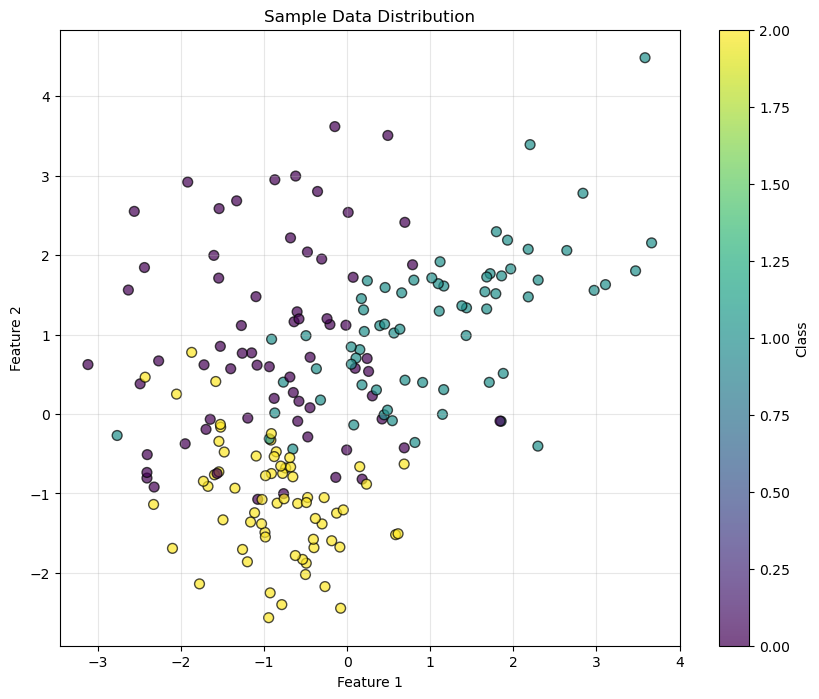

KNN Accuracy (K=5): 0.800


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 创建一个简单的2D数据集用于可视化
from sklearn.datasets import make_classification

X_simple, y_simple = make_classification(n_samples=200, n_features=2, 
                                         n_redundant=0, n_informative=2,
                                         n_clusters_per_class=1, n_classes=3,
                                         random_state=42)

# 可视化数据分布
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple, 
                     cmap='viridis', s=50, edgecolor='black', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sample Data Distribution')
plt.colorbar(scatter, label='Class')
plt.grid(True, alpha=0.3)
plt.show()

# 训练KNN模型
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, 
                                                    test_size=0.3, random_state=42)

# 创建KNN分类器
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 预测
y_pred = knn.predict(X_test)
print(f"KNN Accuracy (K=5): {accuracy_score(y_test, y_pred):.3f}")

4.3 可视化决策边界

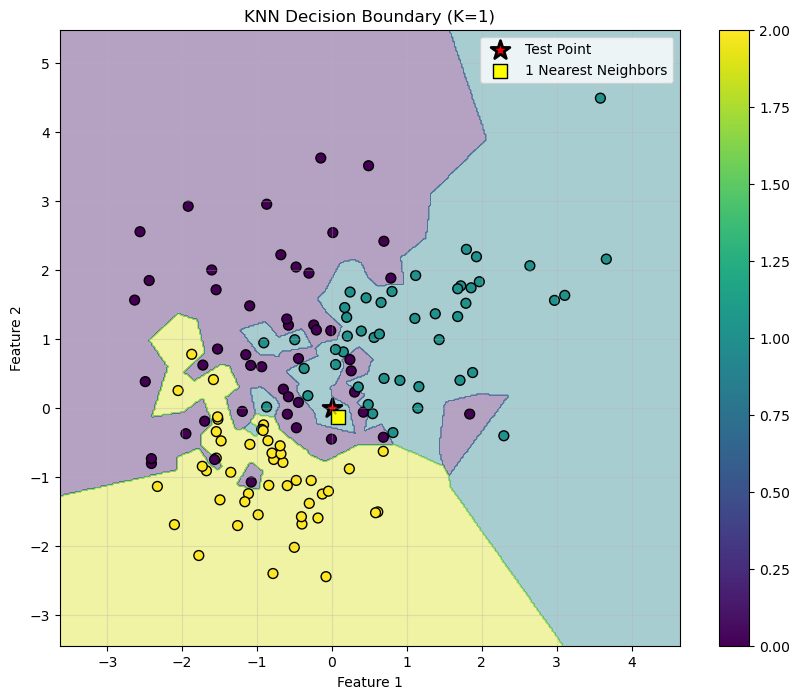

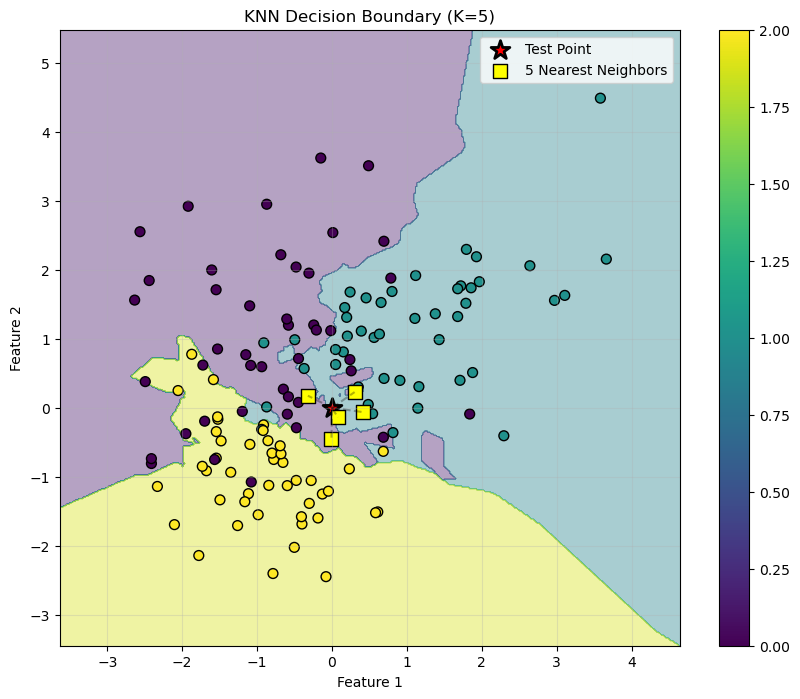

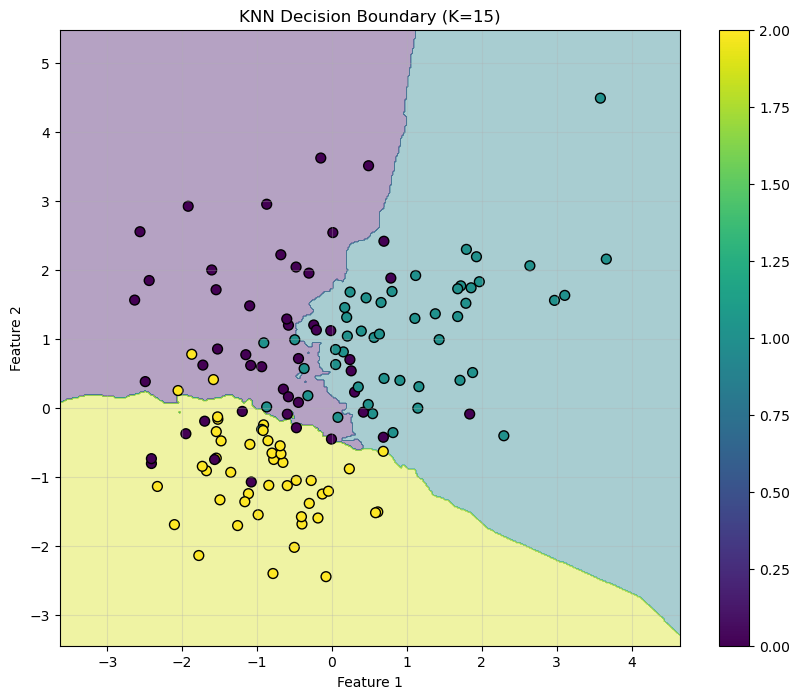

In [5]:
def plot_decision_boundary(X, y, model, title, k=None):
    """绘制KNN的决策边界"""
    h = 0.02  # 网格步长
    
    # 创建网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 预测网格上每个点的类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', 
                         edgecolor='black', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)
    
    # 如果k值较小，显示一个测试点的K个邻居
    if k and k <= 10:
        # 选择一个测试点
        test_point = np.array([[0, 0]])
        distances, indices = model.kneighbors(test_point)
        
        # 绘制测试点
        plt.scatter(test_point[0, 0], test_point[0, 1], c='red', 
                   s=200, marker='*', edgecolor='black', linewidth=2,
                   label='Test Point')
        
        # 绘制K个最近邻
        neighbors = X[indices[0]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], c='yellow', 
                   s=100, marker='s', edgecolor='black', linewidth=1,
                   label=f'{k} Nearest Neighbors')
        
        # 连接测试点和邻居
        for neighbor in neighbors:
            plt.plot([test_point[0, 0], neighbor[0]], 
                    [test_point[0, 1], neighbor[1]], 
                    'k--', alpha=0.3)
        
        plt.legend()
    
    plt.show()

# 可视化不同K值的决策边界
k_values = [1, 5, 15]
for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    plot_decision_boundary(X_train, y_train, knn_k, 
                          f'KNN Decision Boundary (K={k})', k)

4.4 K值选择与性能评估

Dataset shape: (1797, 64)
Number of classes: 10


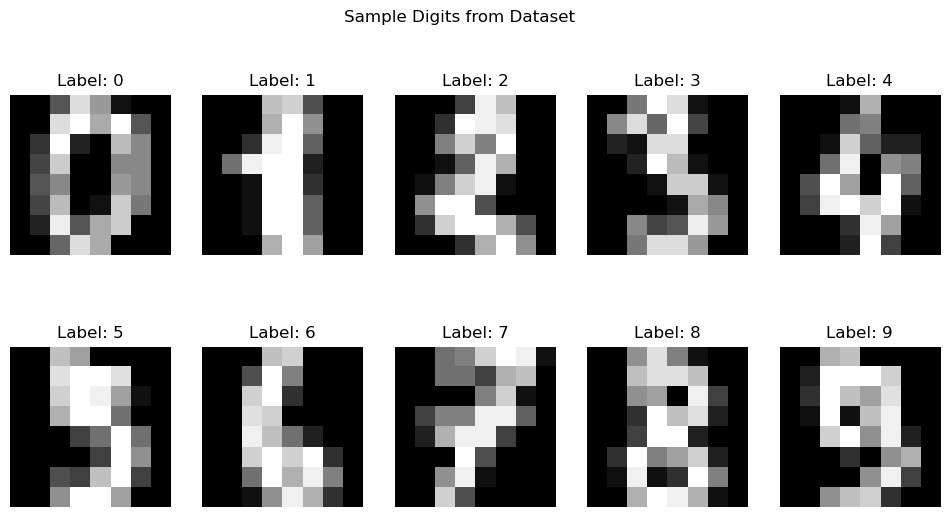

In [ ]:
# 使用手写数字数据集进行更实际的测试
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Dataset shape: {X_digits.shape}")
print(f"Number of classes: {len(np.unique(y_digits))}")

# 显示一些样本
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.suptitle('Sample Digits from Dataset')
plt.show()

# 数据预处理
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, 
                                                    test_size=0.2, random_state=42)

# 标准化（对KNN很重要）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 测试不同的K值
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# 绘制K值选择曲线
plt.figure(figsize=(12, 8))
plt.plot(k_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(k_range, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: K Value Selection')
plt.legend()
plt.grid(True, alpha=0.3)

# 标记最佳K值
best_k = k_range[np.argmax(test_scores)]
best_score = max(test_scores)
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.5)
plt.text(best_k+0.5, 0.9, f'Best K={best_k}\nAccuracy={best_score:.3f}', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

print(f"\nBest K value: {best_k}")
print(f"Best test accuracy: {best_score:.3f}")

4.5 距离度量的影响

In [1]:
# 比较不同距离度量
best_k = k_range[np.argmax(test_scores)]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
results = []

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train_scaled, y_train)
    
    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)
    
    results.append({
        'Metric': metric,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })

results_df = pd.DataFrame(results)
print("\nDistance Metric Comparison:")
print(results_df)

# 可视化比较
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(distance_metrics))
width = 0.35

bars1 = ax.bar(x - width/2, results_df['Train Accuracy'], width, 
                label='Train Accuracy', alpha=0.8)
bars2 = ax.bar(x + width/2, results_df['Test Accuracy'], width, 
                label='Test Accuracy', alpha=0.8)

ax.set_xlabel('Distance Metric')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Performance with Different Distance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(distance_metrics)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

NameError: name 'k_range' is not defined

4.6 KNN的优缺点总结

In [2]:
# 创建一个总结表格
summary_data = {
    'Advantages': [
        'Simple and intuitive',
        'No training phase',
        'Can capture complex patterns',
        'Works well with small datasets',
        'Multi-class naturally'
    ],
    'Disadvantages': [
        'Computationally expensive for prediction',
        'Sensitive to feature scaling',
        'Curse of dimensionality',
        'Sensitive to imbalanced data',
        'Requires good distance metric'
    ]
}

# 打印总结
print("\n" + "="*50)
print("KNN Algorithm Summary")
print("="*50)
print("\nAdvantages:")
for i, adv in enumerate(summary_data['Advantages'], 1):
    print(f"{i}. {adv}")

print("\nDisadvantages:")
for i, dis in enumerate(summary_data['Disadvantages'], 1):
    print(f"{i}. {dis}")

print("\nBest Practices:")
print("1. Always scale your features")
print("2. Use cross-validation to select K")
print("3. Consider dimensionality reduction for high-dimensional data")
print("4. Use appropriate distance metrics for your data type")


KNN Algorithm Summary

Advantages:
1. Simple and intuitive
2. No training phase
3. Can capture complex patterns
4. Works well with small datasets
5. Multi-class naturally

Disadvantages:
1. Computationally expensive for prediction
2. Sensitive to feature scaling
3. Curse of dimensionality
4. Sensitive to imbalanced data
5. Requires good distance metric

Best Practices:
1. Always scale your features
2. Use cross-validation to select K
3. Consider dimensionality reduction for high-dimensional data
4. Use appropriate distance metrics for your data type


第5课：决策树
5.1 决策树原理
决策树是一种树形结构的分类器，通过一系列if-then规则对数据进行分类：

根节点：包含所有训练样本
内部节点：对应特征测试
叶节点：对应类别标签
分支：对应测试结果

决策树的构建过程：

选择最佳分割特征（信息增益、基尼系数）
根据特征值分割数据
递归构建子树
剪枝防止过拟合

5.2 决策树实现与可视化

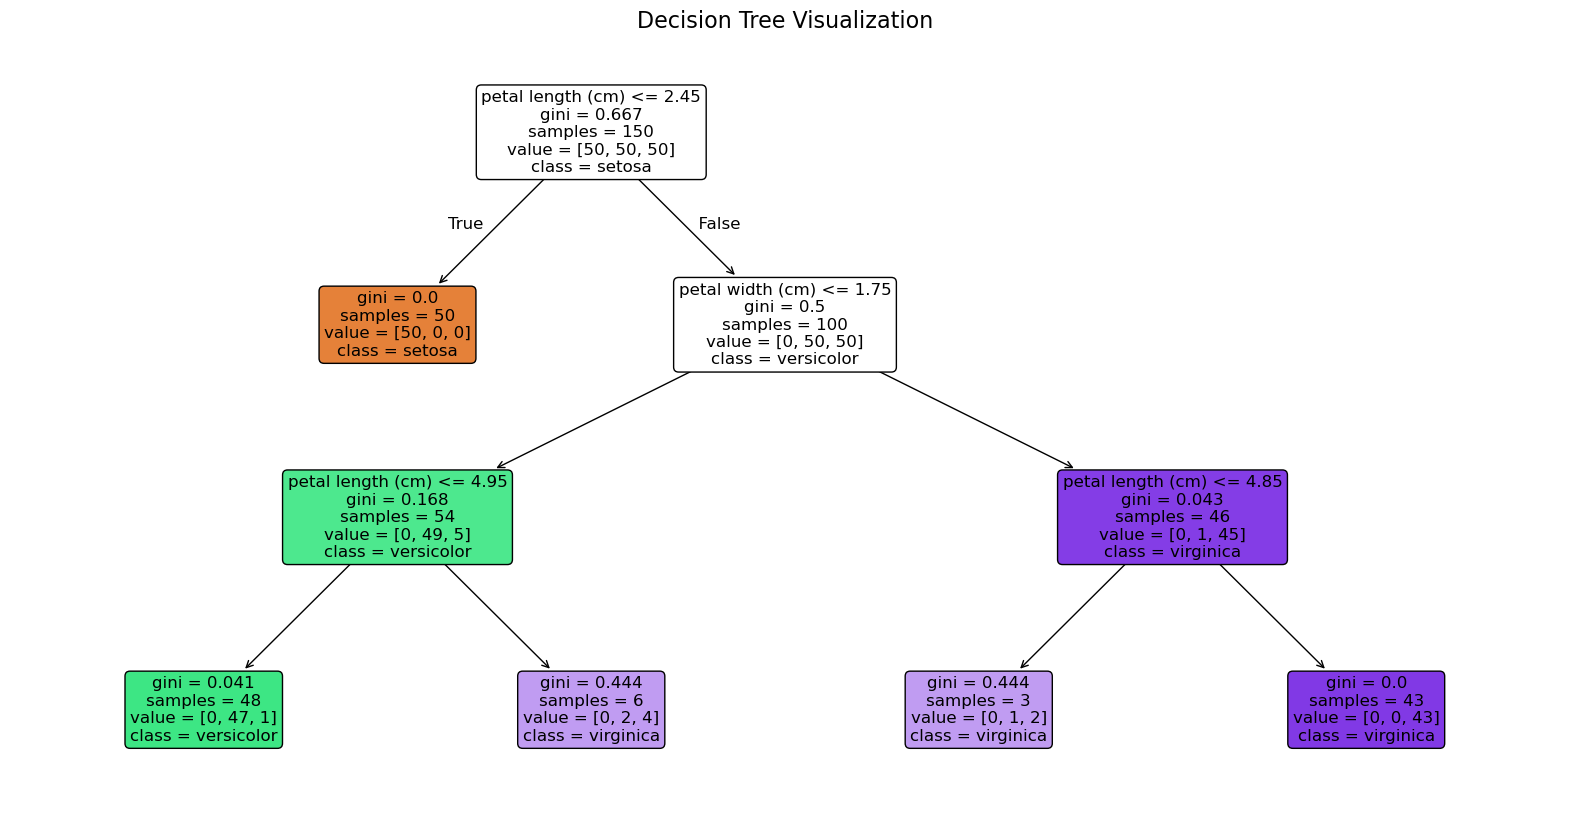


Decision Tree Rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.datasets import load_iris, load_wine

# 使用鸢尾花数据集
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# 只使用两个特征便于可视化
feature_indices = [2, 3]  # petal length and width
X_2d = X_iris[:, feature_indices]
feature_names_2d = [iris.feature_names[i] for i in feature_indices]

# 训练决策树
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_2d, y_iris)

# 可视化决策树结构
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=feature_names_2d, 
          class_names=iris.target_names, 
          filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()

# 打印文本格式的决策规则
tree_rules = export_text(dt, feature_names=feature_names_2d)
print("\nDecision Tree Rules:")
print(tree_rules)

5.3 决策边界可视化

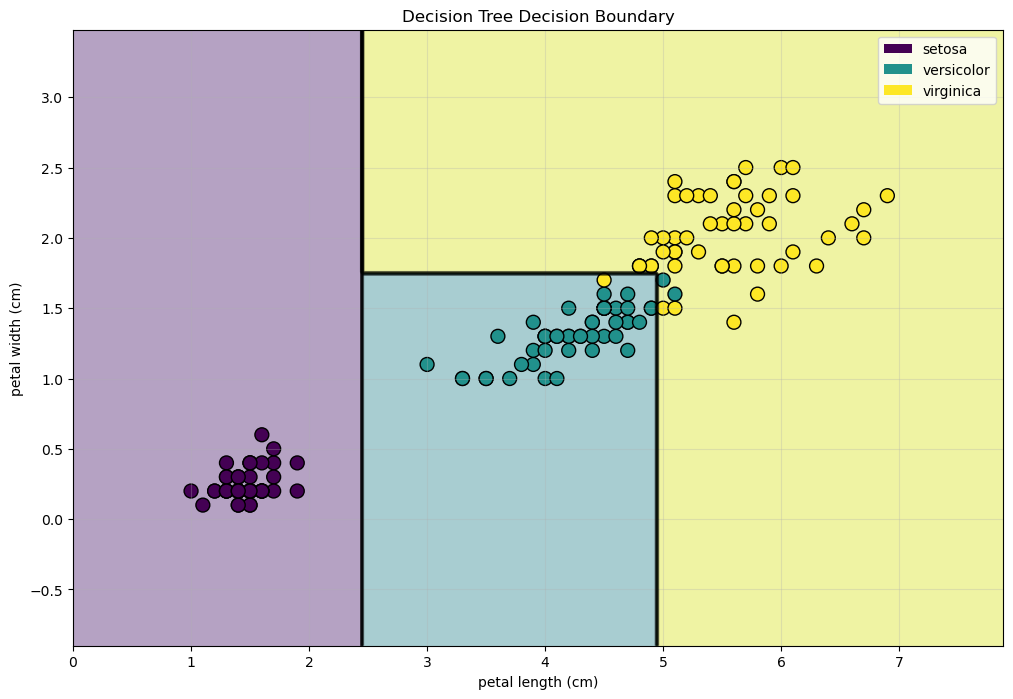

In [7]:
def plot_decision_tree_boundary(X, y, model, feature_names, class_names):
    """绘制决策树的决策边界，显示分割线"""
    h = 0.02
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12, 8))
    
    # 绘制决策区域
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    
    # 绘制数据点
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', 
                         edgecolor='black', s=100)
    
    # 绘制决策边界（分割线）
    # 这里我们使用等高线来显示决策边界
    plt.contour(xx, yy, Z, colors='black', linewidths=2, alpha=0.5)
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Decision Tree Decision Boundary')
    
    # 创建图例
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=plt.cm.viridis(i/2.), 
                            label=class_names[i]) for i in range(3)]
    plt.legend(handles=legend_elements, loc='best')
    
    plt.grid(True, alpha=0.3)
    plt.show()

# 绘制决策边界
plot_decision_tree_boundary(X_2d, y_iris, dt, feature_names_2d, iris.target_names)

5.4 特征重要性分析

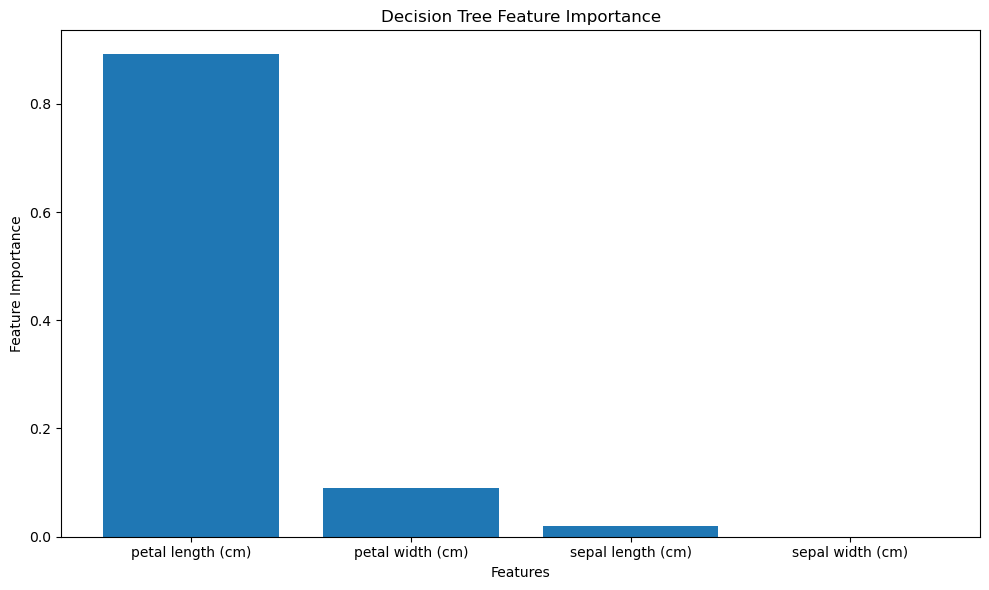


Feature Importance Ranking:
1. petal length (cm): 0.8912
2. petal width (cm): 0.0893
3. sepal length (cm): 0.0195
4. sepal width (cm): 0.0000

Decision Tree Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [8]:
# 使用完整的特征集
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, 
                                                    test_size=0.3, random_state=42)

# 训练决策树
dt_full = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_full.fit(X_train, y_train)

# 获取特征重要性
importances = dt_full.feature_importances_
indices = np.argsort(importances)[::-1]

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(range(X_iris.shape[1]), importances[indices])
plt.xticks(range(X_iris.shape[1]), [iris.feature_names[i] for i in indices])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

# 打印特征重要性
print("\nFeature Importance Ranking:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {iris.feature_names[idx]}: {importances[idx]:.4f}")

# 评估模型性能
y_pred = dt_full.predict(X_test)
print(f"\nDecision Tree Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

5.5 剪枝与过拟合控制

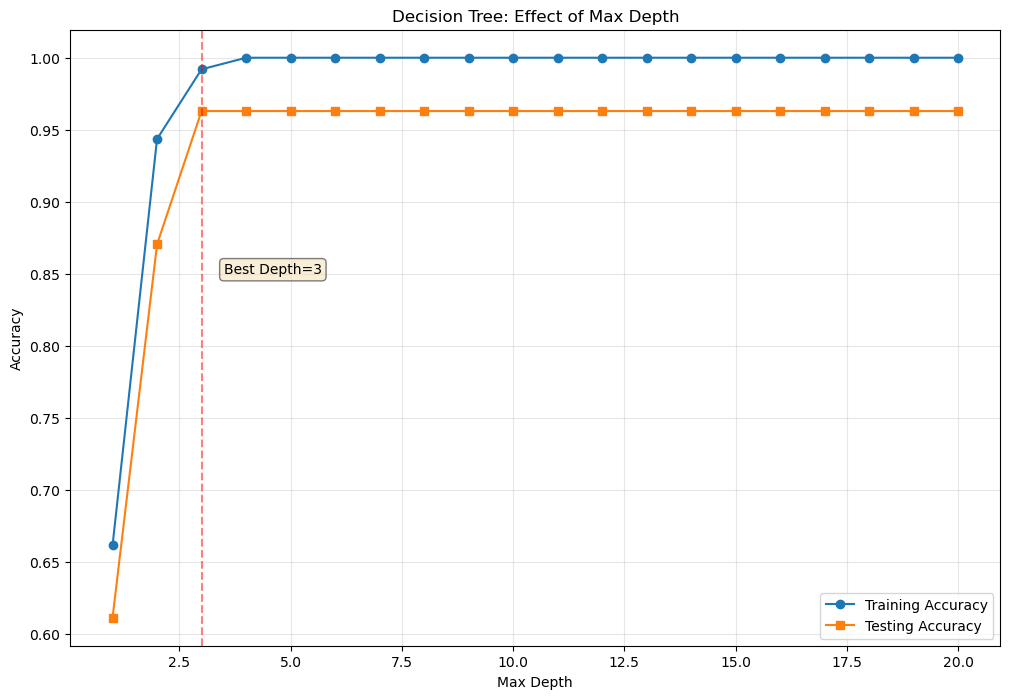

Best max_depth: 3
Best test accuracy: 0.963


In [9]:
# 使用葡萄酒数据集（更复杂）
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# 数据标准化
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

X_train, X_test, y_train, y_test = train_test_split(X_wine_scaled, y_wine, 
                                                    test_size=0.3, random_state=42)

# 测试不同深度的决策树
max_depths = range(1, 21)
train_scores = []
test_scores = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

# 绘制学习曲线
plt.figure(figsize=(12, 8))
plt.plot(max_depths, train_scores, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Effect of Max Depth')
plt.legend()
plt.grid(True, alpha=0.3)

# 标记最佳深度
best_depth = max_depths[np.argmax(test_scores)]
plt.axvline(x=best_depth, color='r', linestyle='--', alpha=0.5)
plt.text(best_depth+0.5, 0.85, f'Best Depth={best_depth}', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

print(f"Best max_depth: {best_depth}")
print(f"Best test accuracy: {max(test_scores):.3f}")

5.6 其他重要参数

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.935
Test set score: 0.963


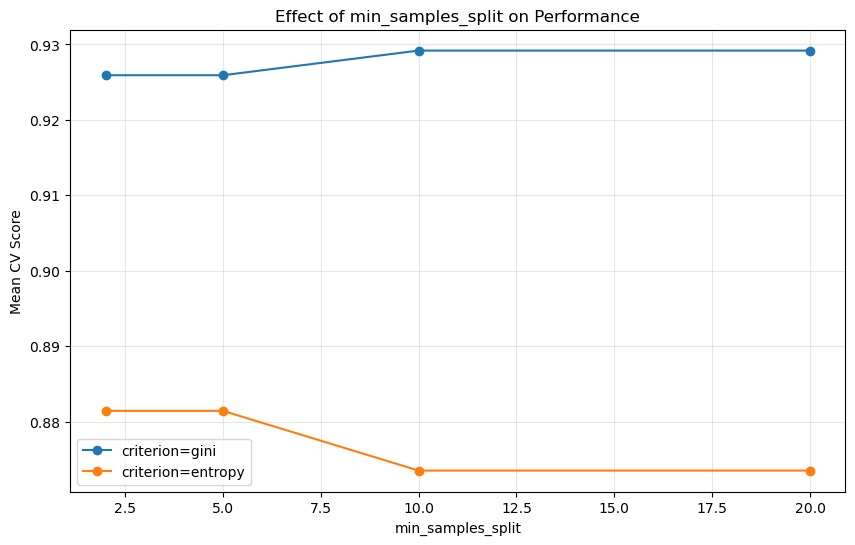

In [11]:
# 测试不同参数组合
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# 网格搜索
dt_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_grid, param_grid, cv=5, 
                          scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")
print(f"Test set score: {grid_search.score(X_test, y_test):.3f}")

# 使用最佳参数的模型
best_dt = grid_search.best_estimator_

# 可视化参数影响（以min_samples_split为例）
results_df = pd.DataFrame(grid_search.cv_results_)
min_samples_splits = param_grid['min_samples_split']

plt.figure(figsize=(10, 6))
for criterion in ['gini', 'entropy']:
    mask = results_df['param_criterion'] == criterion
    subset = results_df[mask]
    
    # 对于每个min_samples_split值，取平均
    mean_scores = []
    for mss in min_samples_splits:
        mss_mask = subset['param_min_samples_split'] == mss
        mean_scores.append(subset[mss_mask]['mean_test_score'].mean())
    
    plt.plot(min_samples_splits, mean_scores, marker='o', label=f'criterion={criterion}')

plt.xlabel('min_samples_split')
plt.ylabel('Mean CV Score')
plt.title('Effect of min_samples_split on Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

第6课：随机森林
6.1 随机森林原理
随机森林是一种集成学习方法，通过构建多个决策树并综合它们的预测结果：

Bootstrap采样：每棵树使用不同的训练样本子集
特征随机性：每个节点分裂时只考虑部分特征
投票机制：分类问题使用多数投票，回归问题使用平均值

随机森林的优势：

减少过拟合
提高泛化能力
可以评估特征重要性
对噪声和异常值更鲁棒

6.2 随机森林实现


Random Forest Accuracy: 0.972


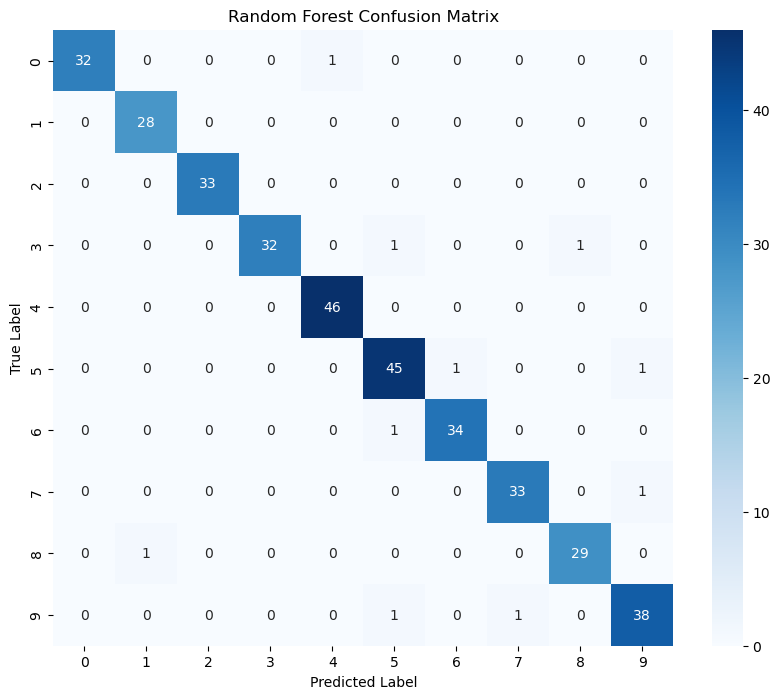


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# 使用手写数字数据集
digits = load_digits()
X = digits.data
y = digits.target

# 划分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 预测和评估
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.3f}")

# 显示混淆矩阵
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

# 分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

6.3 单棵树vs随机森林

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


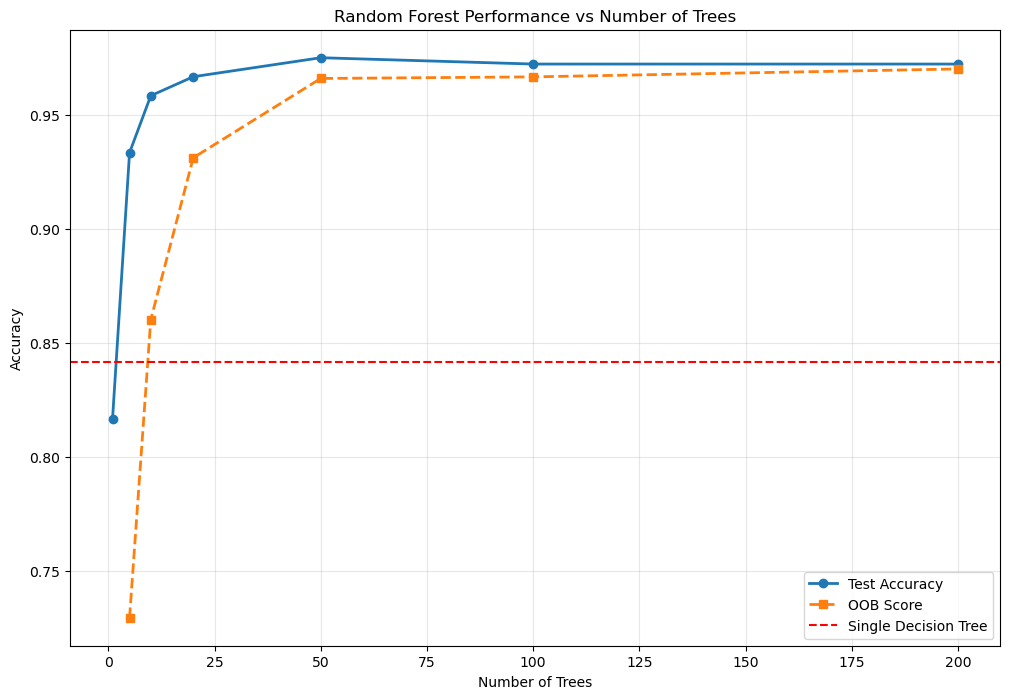

Single Decision Tree Accuracy: 0.842
Random Forest (100 trees) Accuracy: 0.972


In [11]:
# 比较单棵决策树和随机森林
dt_single = DecisionTreeClassifier(random_state=42)
dt_single.fit(X_train, y_train)

# 测试不同数量的树
n_estimators_list = [1, 5, 10, 20, 50, 100, 200]
rf_scores = []
rf_oob_scores = []  # Out-of-bag scores

for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                               oob_score=True,  # 启用OOB评分
                               random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    test_score = rf.score(X_test, y_test)
    rf_scores.append(test_score)
    
    if n_estimators > 1:  # OOB score需要至少2棵树
        rf_oob_scores.append(rf.oob_score_)
    else:
        rf_oob_scores.append(np.nan)

# 可视化比较
plt.figure(figsize=(12, 8))
plt.plot(n_estimators_list, rf_scores, marker='o', label='Test Accuracy', linewidth=2)
plt.plot(n_estimators_list[1:], rf_oob_scores[1:], marker='s', 
         label='OOB Score', linewidth=2, linestyle='--')
plt.axhline(y=dt_single.score(X_test, y_test), color='r', 
            linestyle='--', label='Single Decision Tree')

plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance vs Number of Trees')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Single Decision Tree Accuracy: {dt_single.score(X_test, y_test):.3f}")
print(f"Random Forest (100 trees) Accuracy: {rf_scores[n_estimators_list.index(100)]:.3f}")

6.4 特征重要性深入分析

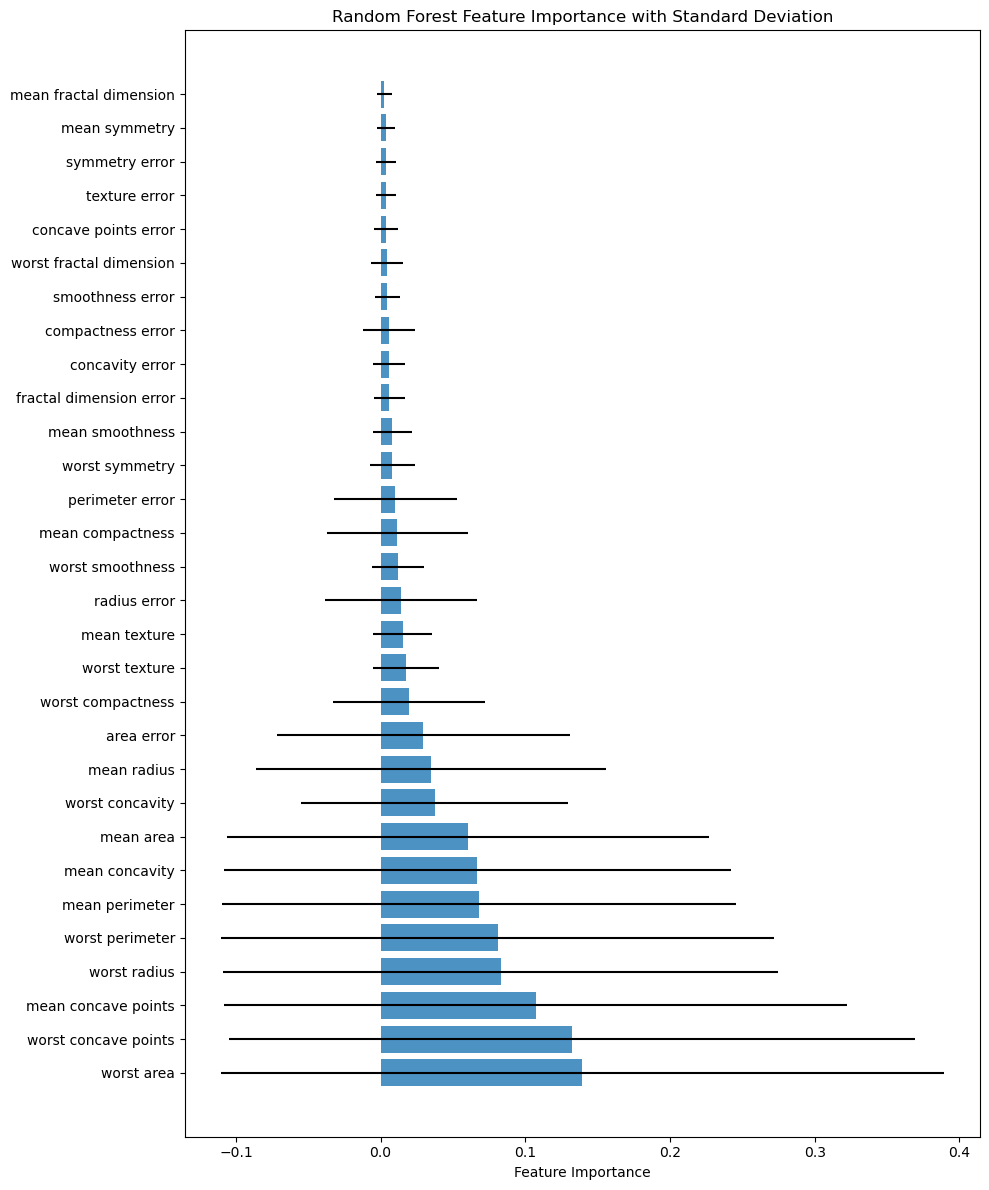


Top 10 Most Important Features:
                 feature  importance       std
23            worst area    0.139357  0.249845
27  worst concave points    0.132225  0.236981
7    mean concave points    0.107046  0.214974
20          worst radius    0.082848  0.191464
22       worst perimeter    0.080850  0.190934
2         mean perimeter    0.067990  0.177588
6         mean concavity    0.066917  0.174949
3              mean area    0.060462  0.166433
26       worst concavity    0.037339  0.092107
0            mean radius    0.034843  0.120980


In [12]:
# 使用乳腺癌数据集
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# 训练随机森林
rf_cancer = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cancer.fit(X_cancer, y_cancer)

# 获取特征重要性
importances = rf_cancer.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_cancer.estimators_], axis=0)

# 创建特征重要性DataFrame
feature_importance_df = pd.DataFrame({
    'feature': cancer.feature_names,
    'importance': importances,
    'std': std
}).sort_values('importance', ascending=False)

# 可视化特征重要性（带误差条）
plt.figure(figsize=(10, 12))
plt.barh(range(len(feature_importance_df)), 
         feature_importance_df['importance'], 
         xerr=feature_importance_df['std'],
         align='center', alpha=0.8)
plt.yticks(range(len(feature_importance_df)), 
           feature_importance_df['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance with Standard Deviation')
plt.tight_layout()
plt.show()

# 打印前10个最重要的特征
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

6.5 随机性的影响

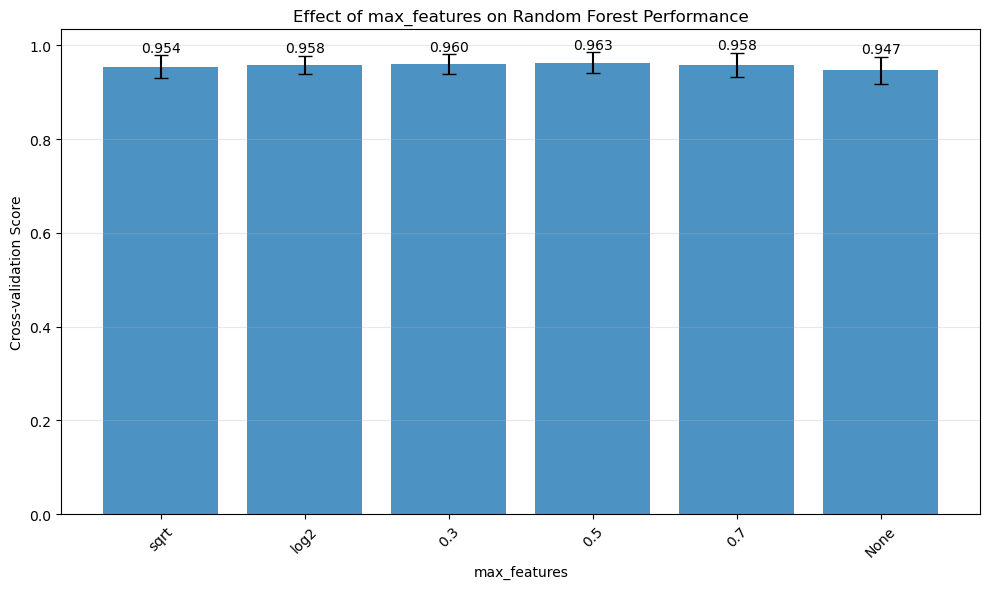


max_features comparison:
  max_features  mean_score  std_score
0         sqrt    0.954324   0.024409
1         log2    0.957833   0.019514
2          0.3    0.959603   0.021168
3          0.5    0.963142   0.021751
4          0.7    0.957879   0.026238
5         None    0.947337   0.028790


In [15]:
# 分析不同随机性参数的影响
max_features_options = ['sqrt', 'log2', 0.3, 0.5, 0.7, None]
results = []

for max_features in max_features_options:
    rf = RandomForestClassifier(n_estimators=50, 
                               max_features=max_features,
                               random_state=42)
    
    # 使用交叉验证
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(rf, X_cancer, y_cancer, cv=5)
    
    results.append({
        'max_features': str(max_features),
        'mean_score': scores.mean(),
        'std_score': scores.std()
    })

results_df = pd.DataFrame(results)

# 可视化
plt.figure(figsize=(10, 6))
x = range(len(results_df))
plt.bar(x, results_df['mean_score'], yerr=results_df['std_score'], 
        capsize=5, alpha=0.8)
plt.xticks(x, results_df['max_features'], rotation=45)
plt.xlabel('max_features')
plt.ylabel('Cross-validation Score')
plt.title('Effect of max_features on Random Forest Performance')
plt.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for i, (mean, std) in enumerate(zip(results_df['mean_score'], results_df['std_score'])):
    plt.text(i, mean + std + 0.001, f'{mean:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nmax_features comparison:")
print(results_df)

6.6 随机森林vs决策树对比实验

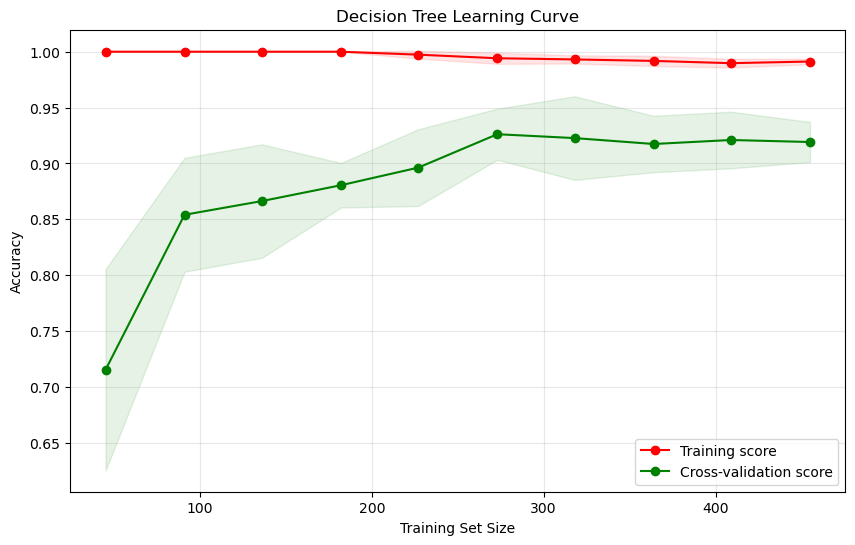

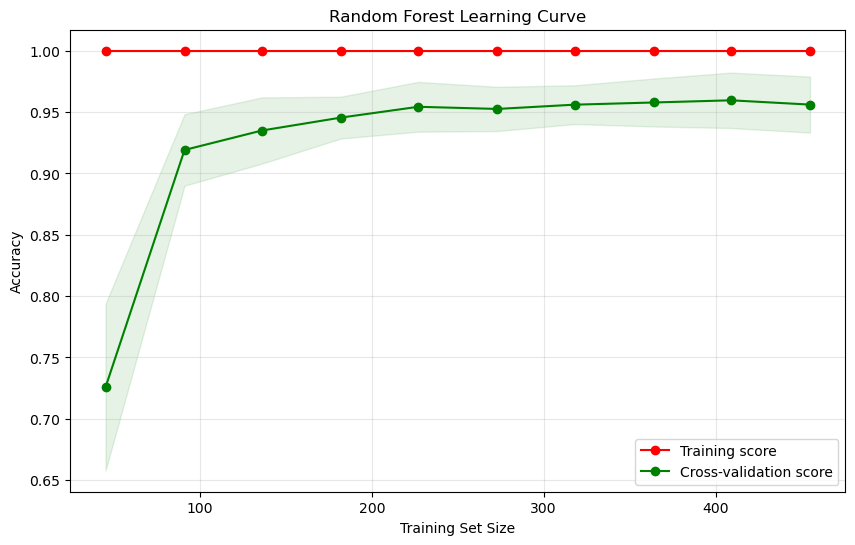


Decision Tree vs Random Forest:
1. Random Forest shows less overfitting (smaller gap between train and validation)
2. Random Forest has more stable performance across different training set sizes
3. Random Forest generally achieves higher validation scores


In [16]:
# 创建一个综合比较
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, title, X, y):
    """绘制学习曲线"""
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)
    plt.show()

# 比较学习曲线
plot_learning_curves(DecisionTreeClassifier(max_depth=5, random_state=42), 
                     "Decision Tree Learning Curve", X_cancer, y_cancer)
plot_learning_curves(RandomForestClassifier(n_estimators=100, random_state=42), 
                     "Random Forest Learning Curve", X_cancer, y_cancer)

# 总结对比
print("\nDecision Tree vs Random Forest:")
print("1. Random Forest shows less overfitting (smaller gap between train and validation)")
print("2. Random Forest has more stable performance across different training set sizes")
print("3. Random Forest generally achieves higher validation scores")

第7课：支持向量机（SVM）
7.1 SVM原理
支持向量机的核心思想：

最大间隔：找到能够最大化类别间间隔的超平面
支持向量：离分割超平面最近的训练样本
核技巧：将数据映射到高维空间，处理非线性问题

SVM的优化目标：

线性可分：硬间隔SVM
近似线性可分：软间隔SVM（引入松弛变量）
非线性：核SVM（使用核函数）

7.2 线性SVM

In [13]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_circles

# 创建线性可分数据
X_linear, y_linear = make_classification(n_samples=200, n_features=2, 
                                         n_redundant=0, n_informative=2,
                                         n_clusters_per_class=1, flip_y=0.1,
                                         class_sep=2.0, random_state=42)

# 划分数据
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, 
                                                    test_size=0.3, random_state=42)

# 训练线性SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

print(f"Linear SVM Accuracy: {svm_linear.score(X_test, y_test):.3f}")
print(f"Number of support vectors: {len(svm_linear.support_)}")

Linear SVM Accuracy: 0.900
Number of support vectors: 40


7.3 可视化SVM决策边界和支持向量

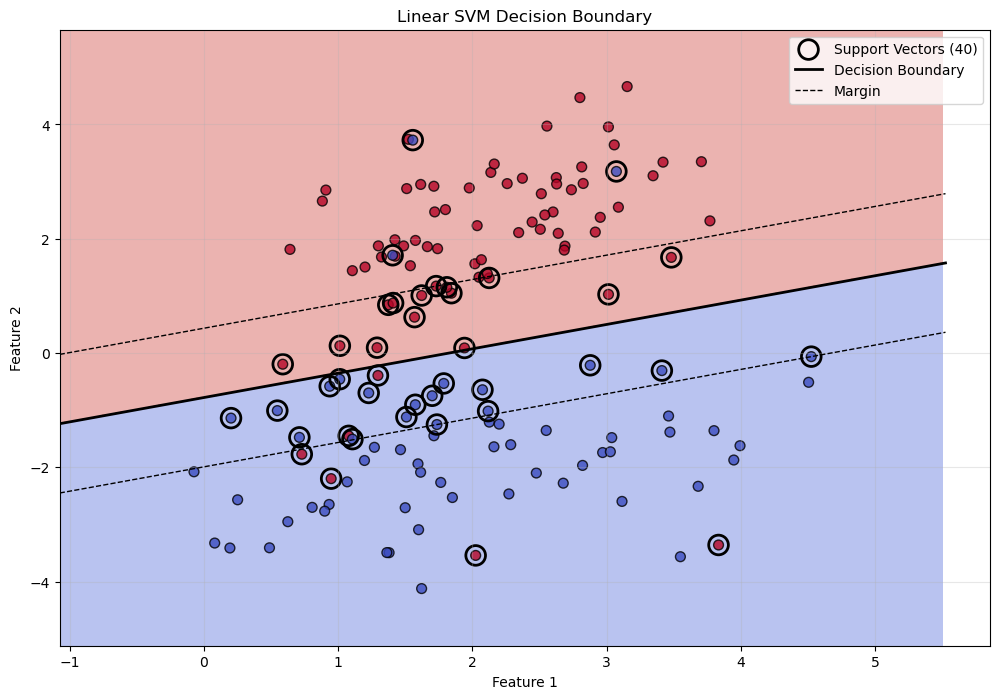

In [18]:
def plot_svm_decision_boundary(X, y, model, title):
    """绘制SVM的决策边界和支持向量"""
    plt.figure(figsize=(12, 8))
    
    # 创建网格
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 预测决策边界
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    
    # 绘制数据点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', 
                edgecolor='black', s=50, alpha=0.8)
    
    # 高亮支持向量
    plt.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1], 
                s=200, facecolors='none', 
                edgecolors='black', linewidth=2,
                label=f'Support Vectors ({len(model.support_)})')
    
    # 如果是线性核，绘制决策边界和间隔
    if hasattr(model, 'coef_'):
        # 获取决策边界
        w = model.coef_[0]
        a = -w[0] / w[1]
        xx_decision = np.linspace(x_min, x_max)
        yy_decision = a * xx_decision - (model.intercept_[0]) / w[1]
        
        # 绘制间隔边界
        margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
        yy_down = yy_decision - np.sqrt(1 + a ** 2) * margin
        yy_up = yy_decision + np.sqrt(1 + a ** 2) * margin
        
        plt.plot(xx_decision, yy_decision, 'k-', linewidth=2, label='Decision Boundary')
        plt.plot(xx_decision, yy_up, 'k--', linewidth=1, label='Margin')
        plt.plot(xx_decision, yy_down, 'k--', linewidth=1)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 可视化线性SVM
plot_svm_decision_boundary(X_train, y_train, svm_linear, 
                          'Linear SVM Decision Boundary')

7.4 C参数的影响（软间隔）

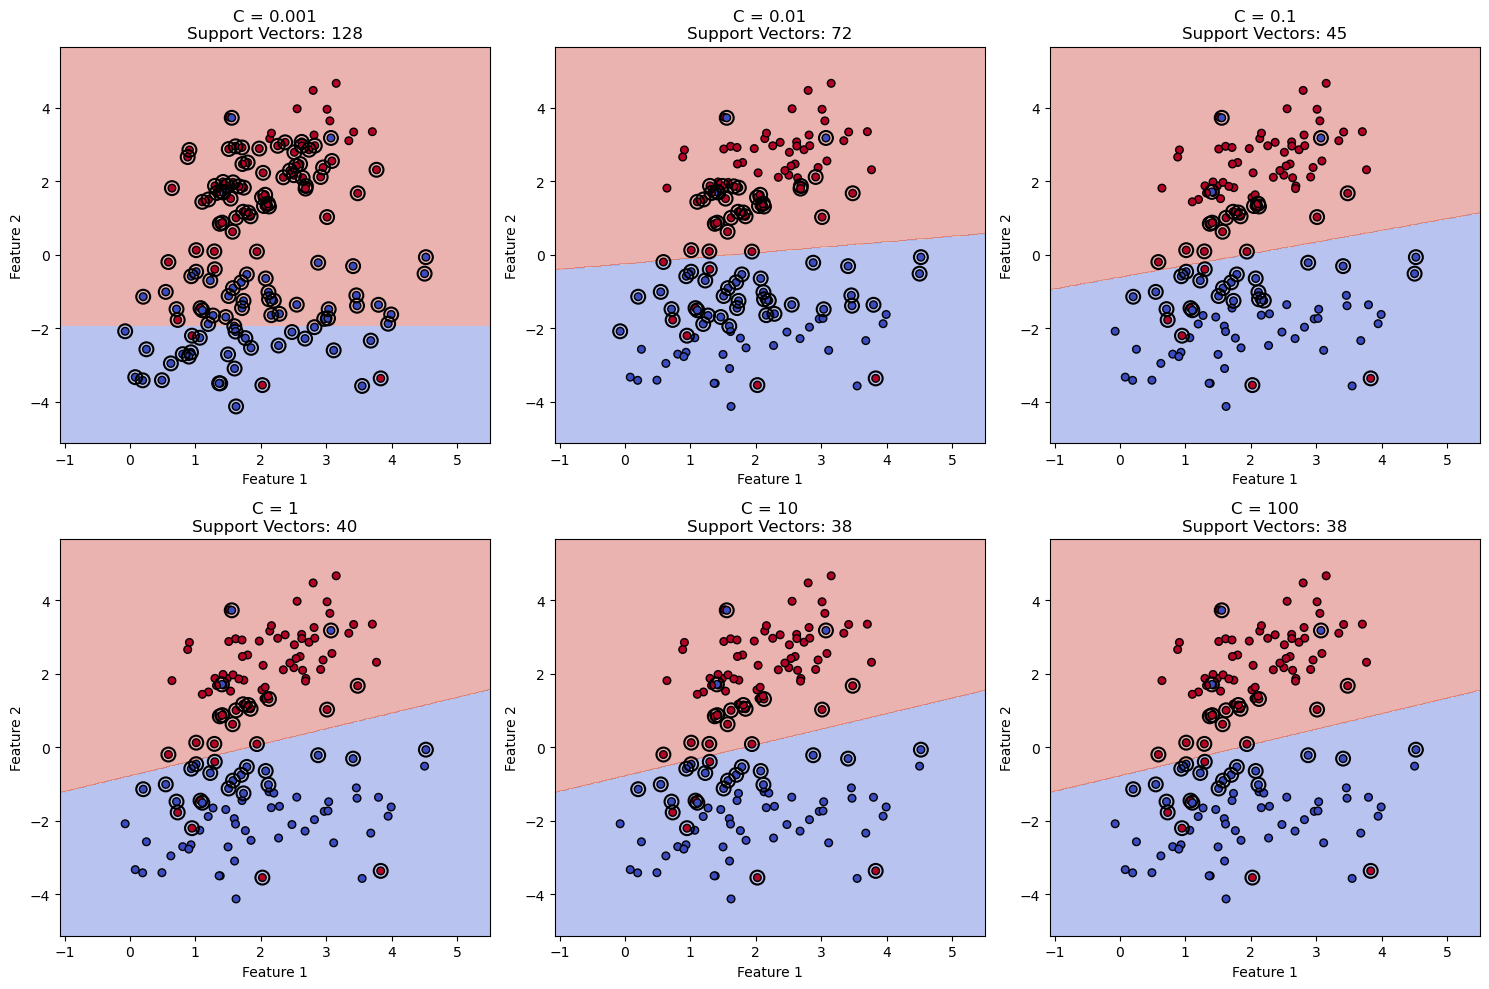

Effect of C parameter:
- Small C: More regularization, wider margin, more support vectors
- Large C: Less regularization, narrower margin, fewer support vectors


In [19]:
# 测试不同C值的影响
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, (C, ax) in enumerate(zip(C_values, axes.flatten())):
    # 训练SVM
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    
    # 绘制决策边界
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
               cmap='coolwarm', edgecolor='black', s=30)
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
               s=100, facecolors='none', edgecolors='black', linewidth=1.5)
    
    ax.set_title(f'C = {C}\nSupport Vectors: {len(svm.support_)}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("Effect of C parameter:")
print("- Small C: More regularization, wider margin, more support vectors")
print("- Large C: Less regularization, narrower margin, fewer support vectors")

7.5 非线性SVM（核技巧）

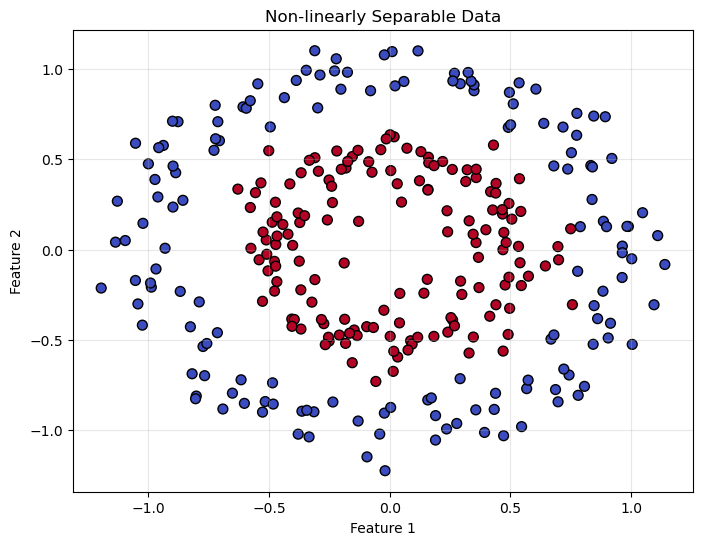

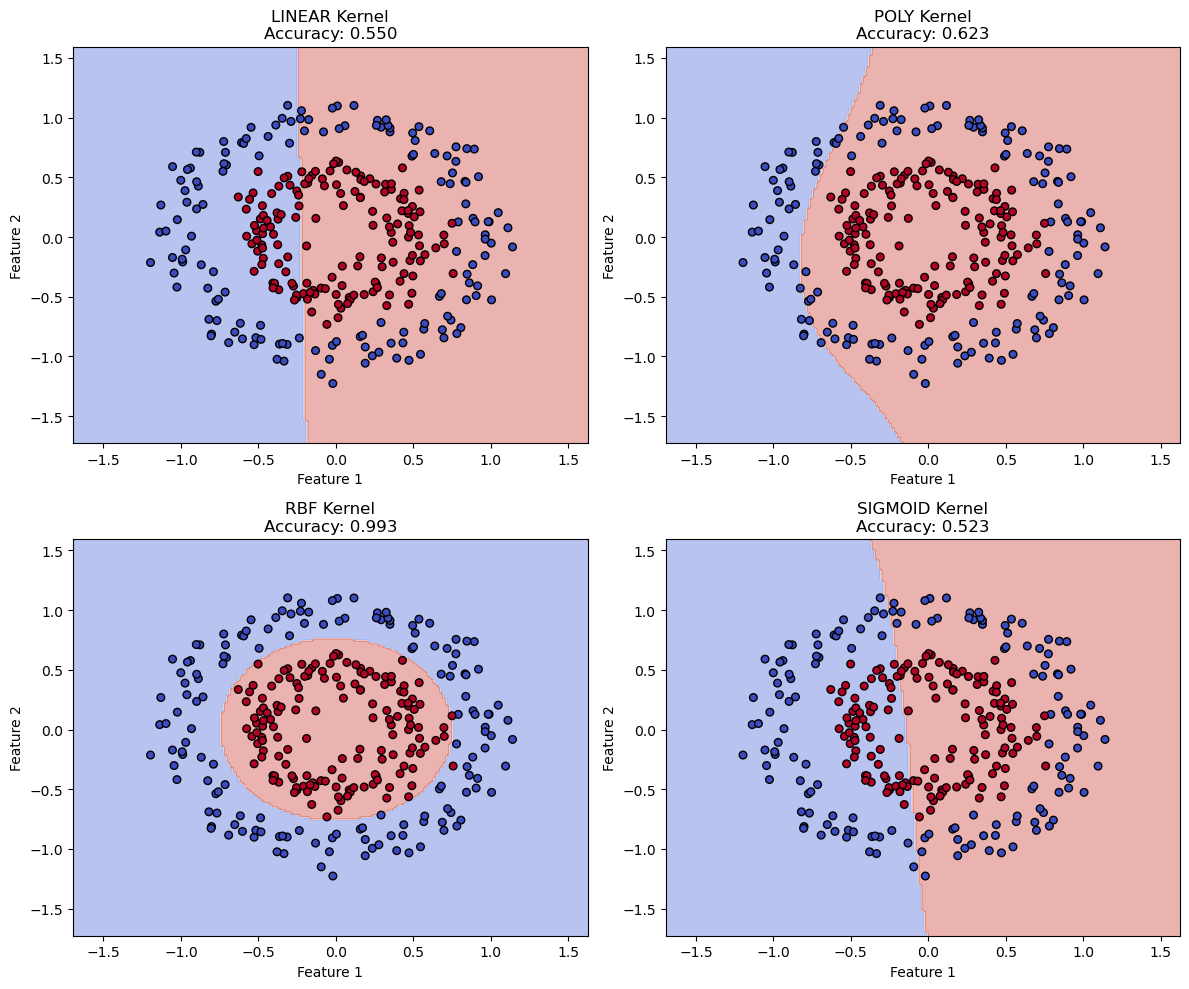

In [20]:
# 创建非线性数据
X_nonlinear, y_nonlinear = make_circles(n_samples=300, noise=0.1, 
                                        factor=0.5, random_state=42)

# 可视化数据
plt.figure(figsize=(8, 6))
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, 
            cmap='coolwarm', edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linearly Separable Data')
plt.grid(True, alpha=0.3)
plt.show()

# 比较不同核函数
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for kernel, ax in zip(kernels, axes.flatten()):
    # 训练SVM
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3, C=1.0, gamma='auto')
    else:
        svm = SVC(kernel=kernel, C=1.0, gamma='auto')
    
    svm.fit(X_nonlinear, y_nonlinear)
    
    # 绘制决策边界
    h = 0.02
    x_min, x_max = X_nonlinear[:, 0].min() - 0.5, X_nonlinear[:, 0].max() + 0.5
    y_min, y_max = X_nonlinear[:, 1].min() - 0.5, X_nonlinear[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, 
               cmap='coolwarm', edgecolor='black', s=30)
    
    score = svm.score(X_nonlinear, y_nonlinear)
    ax.set_title(f'{kernel.upper()} Kernel\nAccuracy: {score:.3f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

7.6 RBF核参数调优

Best parameters: {'C': 10, 'gamma': 0.01}
Best CV score: 0.984
Test score: 0.981


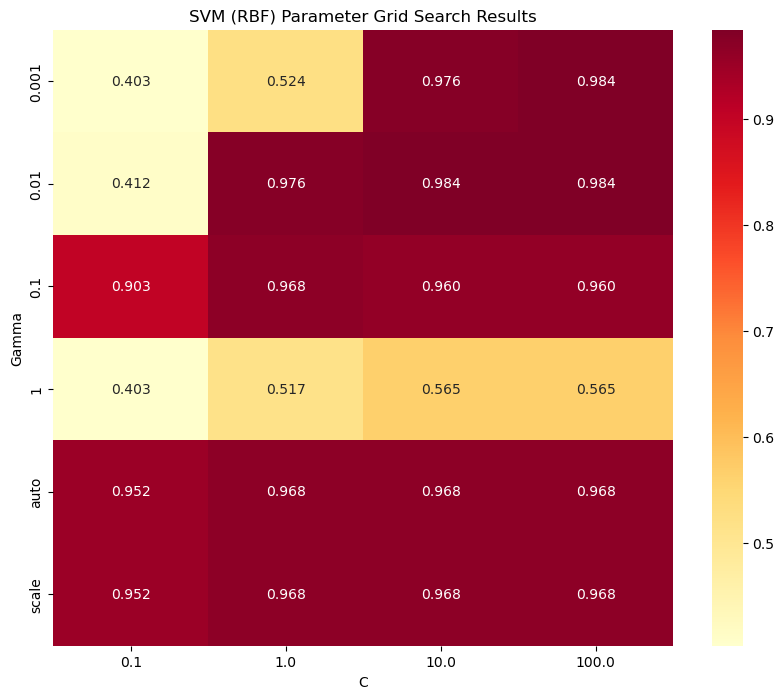

In [14]:
# 对RBF核进行参数调优
from sklearn.model_selection import GridSearchCV

# 使用葡萄酒数据集
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# 标准化（对SVM很重要）
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

X_train, X_test, y_train, y_test = train_test_split(X_wine_scaled, y_wine, 
                                                    test_size=0.3, random_state=42)

# 参数网格
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

# 网格搜索
svm_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, 
                          scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.3f}")
print(f"Test score: {grid_search.score(X_test, y_test):.3f}")

# 可视化参数影响
results = pd.DataFrame(grid_search.cv_results_)

# 创建热图
scores = results.pivot_table(index='param_gamma', 
                             columns='param_C', 
                             values='mean_test_score')

plt.figure(figsize=(10, 8))
sns.heatmap(scores, annot=True, fmt='.3f', cmap='YlOrRd')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('SVM (RBF) Parameter Grid Search Results')
plt.show()

7.7 多类别SVM

In [15]:
# SVM多分类策略
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# 使用鸢尾花数据集（3类）
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# 标准化
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

X_train, X_test, y_train, y_test = train_test_split(X_iris_scaled, y_iris, 
                                                    test_size=0.3, random_state=42)

# 比较不同的多分类策略
strategies = {
    'OvO (default)': SVC(kernel='rbf'),
    'OvR': OneVsRestClassifier(SVC(kernel='rbf')),
    'OvO explicit': OneVsOneClassifier(SVC(kernel='rbf'))
}

results = []
for name, model in strategies.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results.append({'Strategy': name, 'Accuracy': score})
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 打印分类报告
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 显示结果比较
results_df = pd.DataFrame(results)
print("\nMulti-class SVM Strategy Comparison:")
print(results_df)


OvO (default) Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


OvR Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


OvO explicit Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00   

第8课：逻辑回归
8.1 逻辑回归原理
逻辑回归虽然名字中有"回归"，但实际上是一种分类算法：

Sigmoid函数：将线性组合映射到[0,1]区间作为概率
决策边界：概率为0.5的超平面
最大似然估计：通过最大化似然函数来估计参数
正则化：L1（Lasso）和L2（Ridge）防止过拟合

8.2 二分类逻辑回归

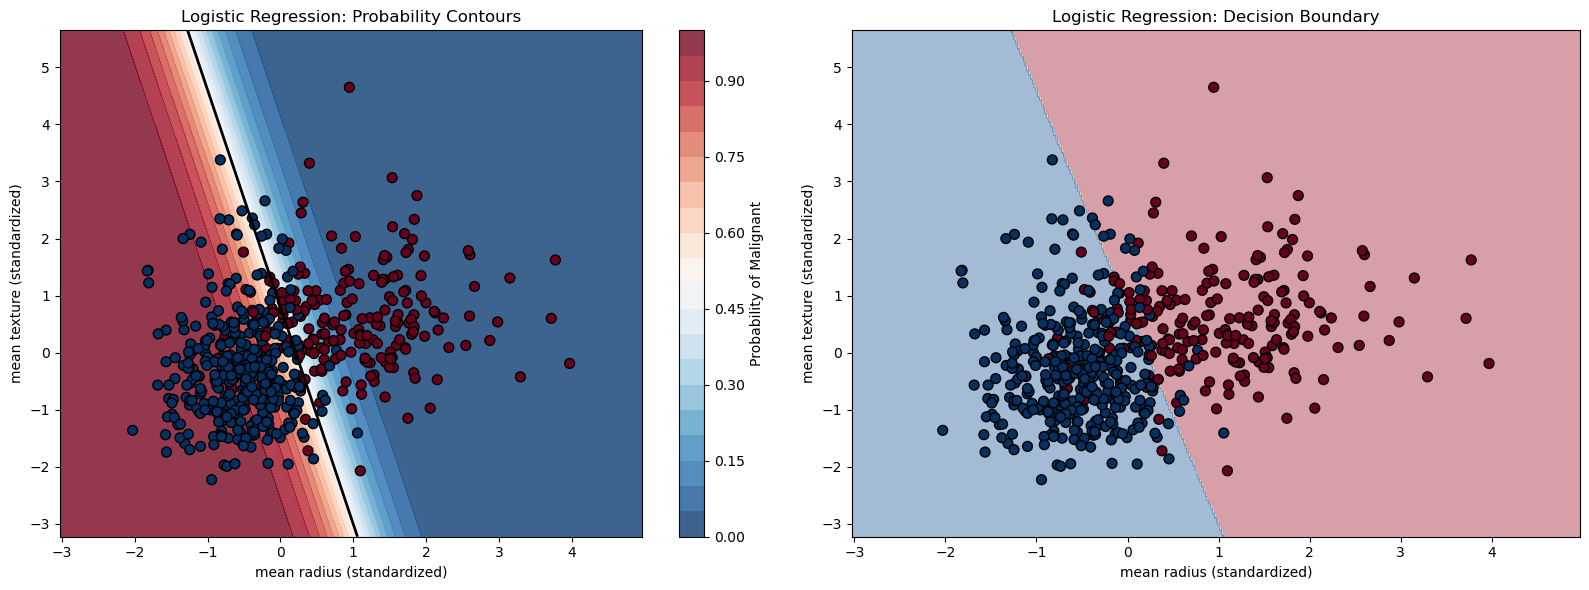

Coefficients: [-3.33642177 -0.87670148]
Intercept: 0.6994318055050288
Training accuracy: 0.891


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

# 加载乳腺癌数据集
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# 选择两个特征进行可视化
feature_indices = [0, 1]  # mean radius and mean texture
X_2d = X_cancer[:, feature_indices]
feature_names_2d = [cancer.feature_names[i] for i in feature_indices]

# 标准化
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)

# 训练逻辑回归
lr = LogisticRegression(random_state=42)
lr.fit(X_2d_scaled, y_cancer)

# 创建网格来可视化决策边界和概率
h = 0.02
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 预测概率
Z_proba = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_proba = Z_proba.reshape(xx.shape)

# 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 左图：概率等高线
contour = ax1.contourf(xx, yy, Z_proba, levels=20, cmap='RdBu_r', alpha=0.8)
scatter = ax1.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], 
                      c=y_cancer, cmap='RdBu', edgecolor='black', s=50)
ax1.contour(xx, yy, Z_proba, levels=[0.5], colors='black', linewidths=2)
ax1.set_xlabel(f'{feature_names_2d[0]} (standardized)')
ax1.set_ylabel(f'{feature_names_2d[1]} (standardized)')
ax1.set_title('Logistic Regression: Probability Contours')
fig.colorbar(contour, ax=ax1, label='Probability of Malignant')

# 右图：决策边界
Z_pred = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_pred = Z_pred.reshape(xx.shape)
ax2.contourf(xx, yy, Z_pred, alpha=0.4, cmap='RdBu')
ax2.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], 
            c=y_cancer, cmap='RdBu', edgecolor='black', s=50)
ax2.set_xlabel(f'{feature_names_2d[0]} (standardized)')
ax2.set_ylabel(f'{feature_names_2d[1]} (standardized)')
ax2.set_title('Logistic Regression: Decision Boundary')

plt.tight_layout()
plt.show()

# 打印模型参数
print(f"Coefficients: {lr.coef_[0]}")
print(f"Intercept: {lr.intercept_[0]}")
print(f"Training accuracy: {lr.score(X_2d_scaled, y_cancer):.3f}")

8.3 Sigmoid函数可视化

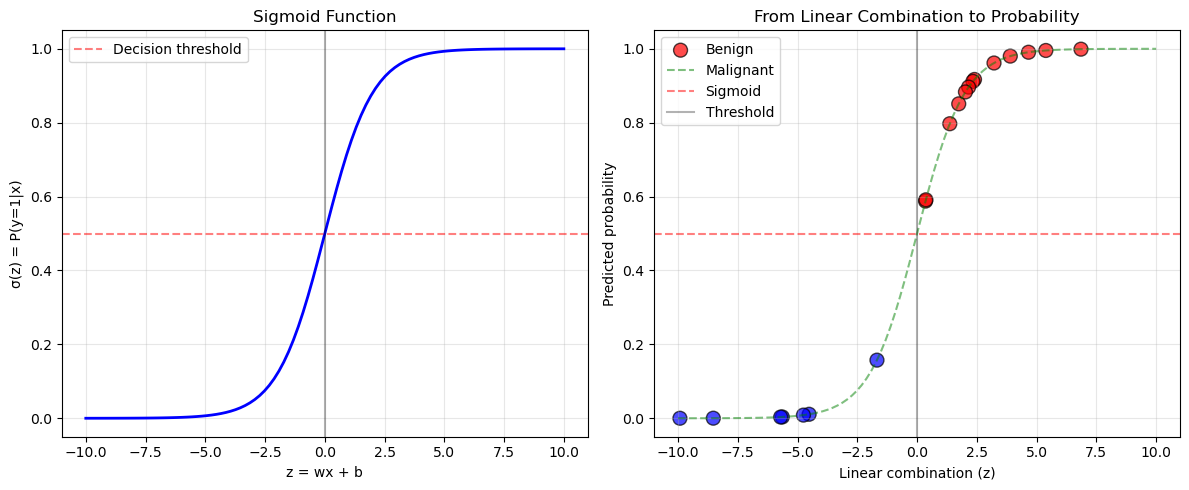

In [17]:
# 可视化sigmoid函数和决策过程
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 创建一个示例
z = np.linspace(-10, 10, 100)
sigmoid_z = sigmoid(z)

plt.figure(figsize=(12, 5))

# 子图1：Sigmoid函数
plt.subplot(1, 2, 1)
plt.plot(z, sigmoid_z, 'b-', linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Decision threshold')
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('z = wx + b')
plt.ylabel('σ(z) = P(y=1|x)')
plt.title('Sigmoid Function')
plt.grid(True, alpha=0.3)
plt.legend()

# 子图2：从线性到概率
plt.subplot(1, 2, 2)
# 选择一些样本点
sample_indices = np.random.choice(len(X_2d_scaled), 20)
X_samples = X_2d_scaled[sample_indices]
y_samples = y_cancer[sample_indices]

# 计算线性组合
z_samples = X_samples @ lr.coef_[0] + lr.intercept_[0]
proba_samples = lr.predict_proba(X_samples)[:, 1]

# 绘制
colors = ['blue' if y == 0 else 'red' for y in y_samples]
plt.scatter(z_samples, proba_samples, c=colors, s=100, 
            edgecolor='black', alpha=0.7)
plt.plot(z, sigmoid(z), 'g--', alpha=0.5, label='Sigmoid curve')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Linear combination (z)')
plt.ylabel('Predicted probability')
plt.title('From Linear Combination to Probability')
plt.legend(['Benign', 'Malignant', 'Sigmoid', 'Threshold'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

8.4 正则化的影响

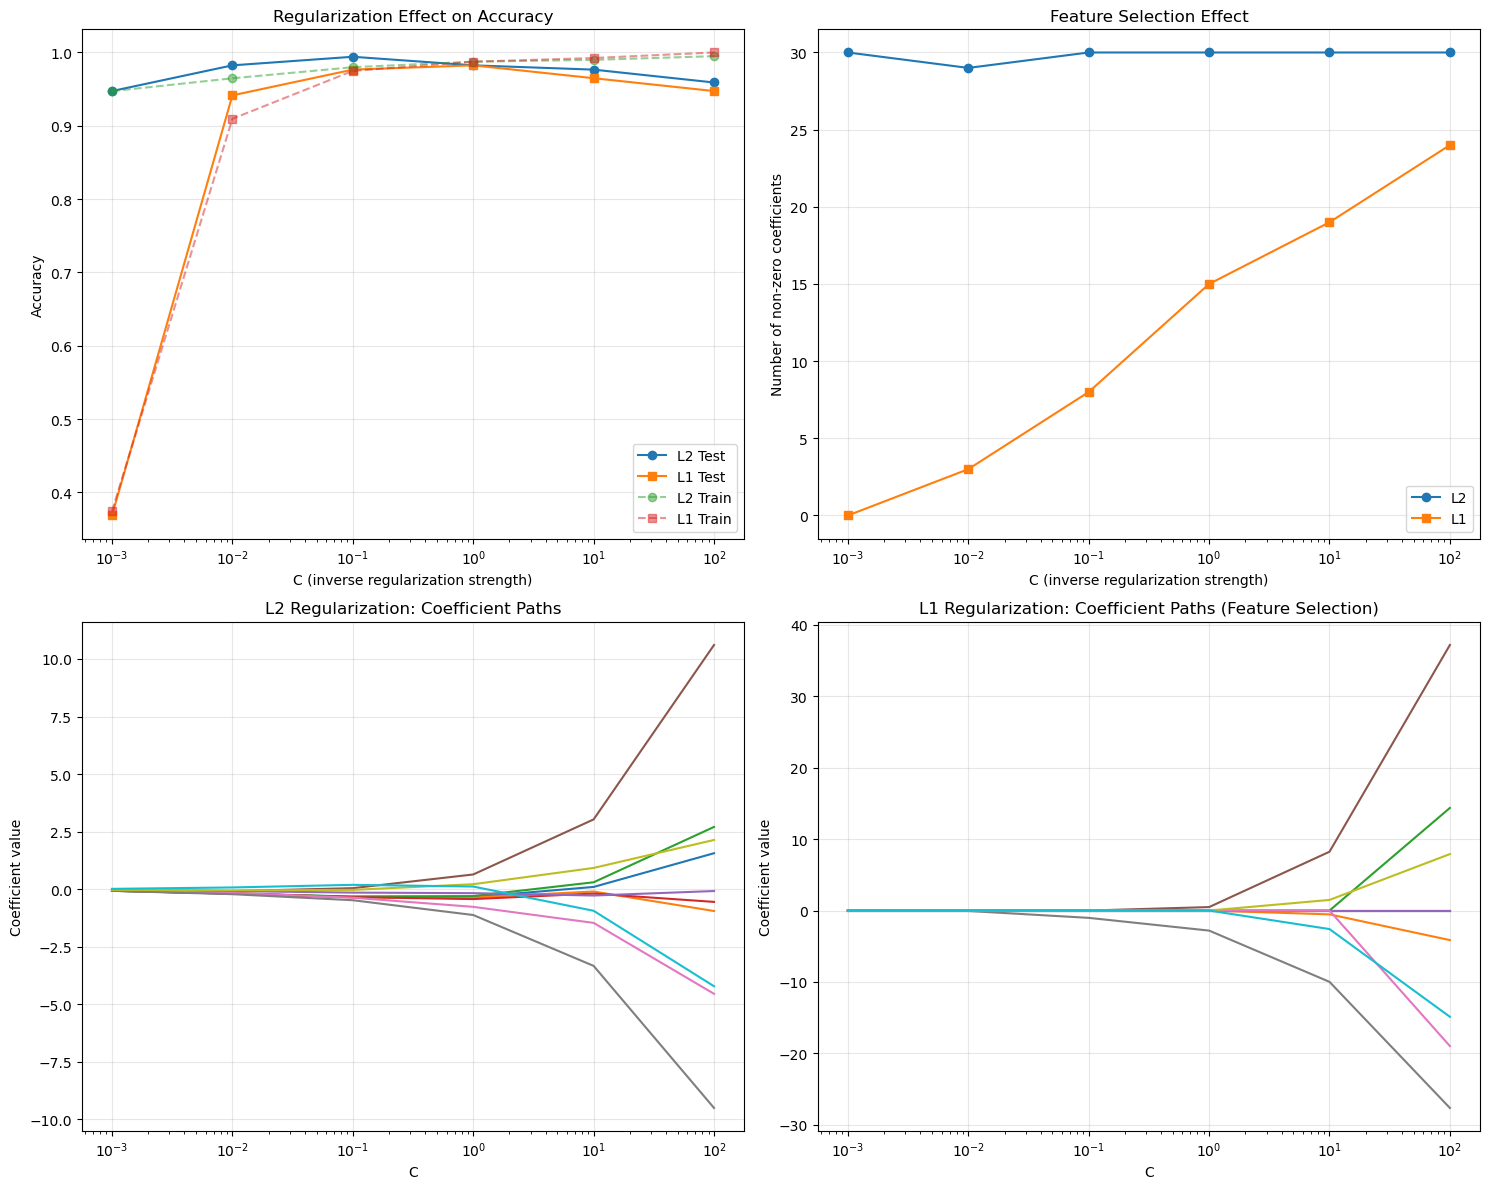

Regularization Effects Summary:
- L2: Shrinks coefficients but keeps all features
- L1: Can set coefficients to exactly zero (feature selection)
- Small C (strong regularization): Simpler model, may underfit
- Large C (weak regularization): Complex model, may overfit


In [25]:
# 比较不同正则化强度
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# 使用全部特征
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, 
                                                    test_size=0.3, random_state=42)

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 存储结果
results_l2 = []
results_l1 = []
coef_l2 = []
coef_l1 = []

for C in C_values:
    # L2正则化
    lr_l2 = LogisticRegression(C=C, penalty='l2', solver='liblinear', 
                               random_state=42, max_iter=1000)
    lr_l2.fit(X_train_scaled, y_train)
    results_l2.append({
        'C': C,
        'train_score': lr_l2.score(X_train_scaled, y_train),
        'test_score': lr_l2.score(X_test_scaled, y_test),
        'n_nonzero_coef': np.sum(np.abs(lr_l2.coef_[0]) > 1e-4)
    })
    coef_l2.append(lr_l2.coef_[0])
    
    # L1正则化
    lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear', 
                               random_state=42, max_iter=1000)
    lr_l1.fit(X_train_scaled, y_train)
    results_l1.append({
        'C': C,
        'train_score': lr_l1.score(X_train_scaled, y_train),
        'test_score': lr_l1.score(X_test_scaled, y_test),
        'n_nonzero_coef': np.sum(np.abs(lr_l1.coef_[0]) > 1e-4)
    })
    coef_l1.append(lr_l1.coef_[0])

# 转换为DataFrame
results_l2_df = pd.DataFrame(results_l2)
results_l1_df = pd.DataFrame(results_l1)

# 可视化比较
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 准确率比较
ax1 = axes[0, 0]
ax1.semilogx(C_values, results_l2_df['test_score'], 'o-', label='L2 Test')
ax1.semilogx(C_values, results_l1_df['test_score'], 's-', label='L1 Test')
ax1.semilogx(C_values, results_l2_df['train_score'], 'o--', alpha=0.5, label='L2 Train')
ax1.semilogx(C_values, results_l1_df['train_score'], 's--', alpha=0.5, label='L1 Train')
ax1.set_xlabel('C (inverse regularization strength)')
ax1.set_ylabel('Accuracy')
ax1.set_title('Regularization Effect on Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 非零系数数量
ax2 = axes[0, 1]
ax2.semilogx(C_values, results_l2_df['n_nonzero_coef'], 'o-', label='L2')
ax2.semilogx(C_values, results_l1_df['n_nonzero_coef'], 's-', label='L1')
ax2.set_xlabel('C (inverse regularization strength)')
ax2.set_ylabel('Number of non-zero coefficients')
ax2.set_title('Feature Selection Effect')
ax2.legend()
ax2.grid(True, alpha=0.3)

# L2系数路径
ax3 = axes[1, 0]
coef_l2_array = np.array(coef_l2).T
for i in range(min(10, coef_l2_array.shape[0])):  # 只显示前10个特征
    ax3.semilogx(C_values, coef_l2_array[i], label=f'Feature {i}')
ax3.set_xlabel('C')
ax3.set_ylabel('Coefficient value')
ax3.set_title('L2 Regularization: Coefficient Paths')
ax3.grid(True, alpha=0.3)

# L1系数路径
ax4 = axes[1, 1]
coef_l1_array = np.array(coef_l1).T
for i in range(min(10, coef_l1_array.shape[0])):  # 只显示前10个特征
    ax4.semilogx(C_values, coef_l1_array[i], label=f'Feature {i}')
ax4.set_xlabel('C')
ax4.set_ylabel('Coefficient value')
ax4.set_title('L1 Regularization: Coefficient Paths (Feature Selection)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Regularization Effects Summary:")
print("- L2: Shrinks coefficients but keeps all features")
print("- L1: Can set coefficients to exactly zero (feature selection)")
print("- Small C (strong regularization): Simpler model, may underfit")
print("- Large C (weak regularization): Complex model, may overfit")

8.5 多分类逻辑回归

Multi-class Logistic Regression Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


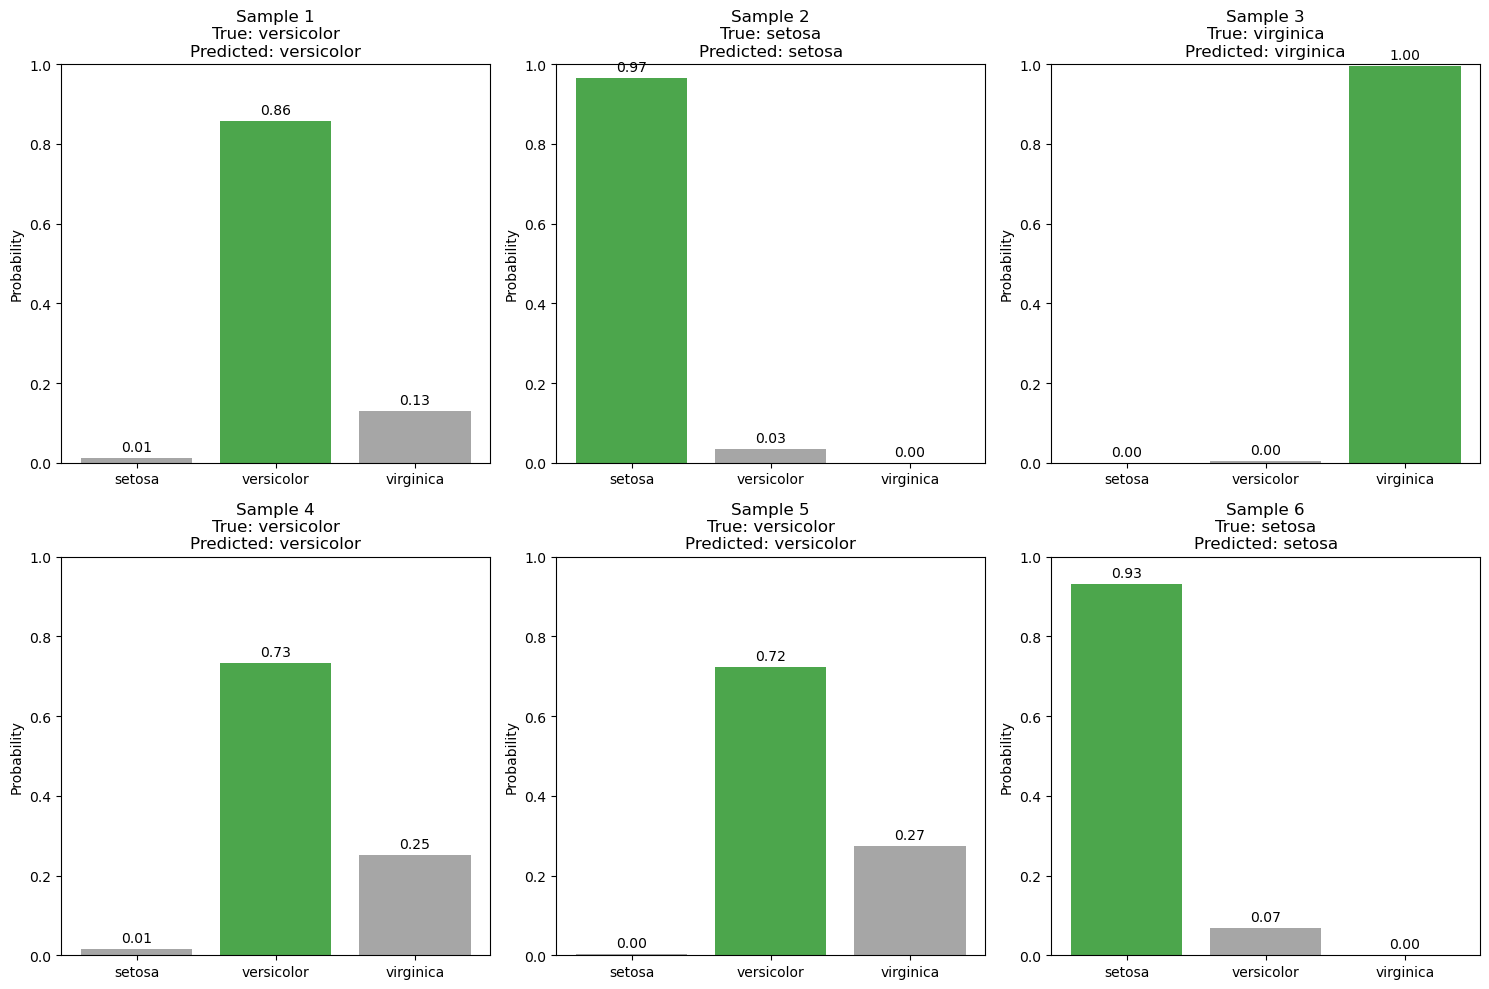

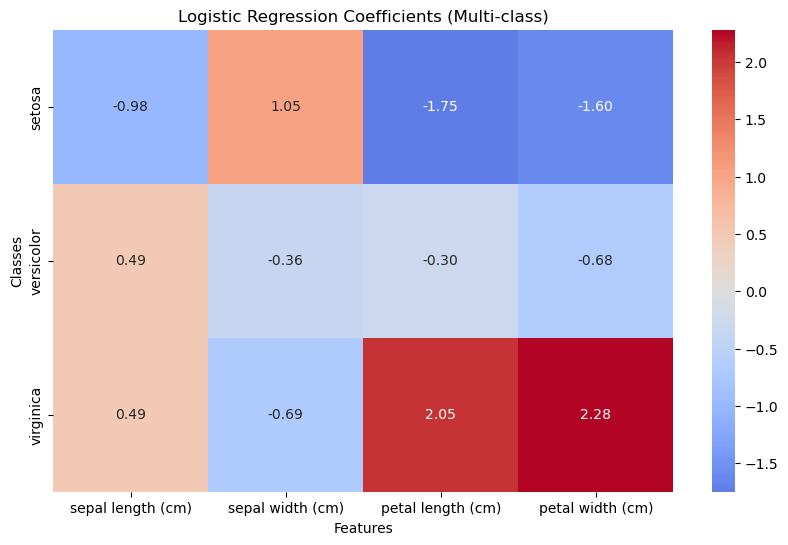

In [18]:
# 使用鸢尾花数据集（3类）
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# 标准化
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

X_train, X_test, y_train, y_test = train_test_split(X_iris_scaled, y_iris, 
                                                    test_size=0.3, random_state=42)

# 训练多分类逻辑回归
lr_multi = LogisticRegression(multi_class='multinomial', 
                              solver='lbfgs', 
                              max_iter=1000,
                              random_state=42)
lr_multi.fit(X_train, y_train)

# 预测
y_pred = lr_multi.predict(X_test)
y_pred_proba = lr_multi.predict_proba(X_test)

print(f"Multi-class Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 可视化预测概率
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# 显示前6个测试样本的预测概率
for i in range(min(6, len(X_test))):
    ax = axes[i]
    probs = y_pred_proba[i]
    colors = ['green' if j == y_test[i] else 'red' if j == y_pred[i] else 'gray' 
              for j in range(len(iris.target_names))]
    
    bars = ax.bar(iris.target_names, probs, color=colors, alpha=0.7)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Probability')
    ax.set_title(f'Sample {i+1}\nTrue: {iris.target_names[y_test[i]]}\n'
                 f'Predicted: {iris.target_names[y_pred[i]]}')
    
    # 添加概率值
    for bar, prob in zip(bars, probs):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{prob:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 可视化系数矩阵
plt.figure(figsize=(10, 6))
coef_matrix = lr_multi.coef_
sns.heatmap(coef_matrix, annot=True, fmt='.2f', 
            xticklabels=iris.feature_names,
            yticklabels=iris.target_names,
            cmap='coolwarm', center=0)
plt.title('Logistic Regression Coefficients (Multi-class)')
plt.xlabel('Features')
plt.ylabel('Classes')
plt.show()